In [3]:
# Data Unzipping and Directory Setup
!unzip public_data_crisprCas9-main.zip
%cd public_data_crisprCas9-main

Archive:  public_data_crisprCas9-main.zip
fb642df5a74f3f4d76e643224e1161a1fc6400dd
   creating: public_data_crisprCas9-main/
  inflating: public_data_crisprCas9-main/README.md  
  inflating: public_data_crisprCas9-main/a_demo_of_a_simple_classification_model.ipynb  
   creating: public_data_crisprCas9-main/data/
   creating: public_data_crisprCas9-main/data/deepHF/
  inflating: public_data_crisprCas9-main/data/deepHF/deephf.zip  
 extracting: public_data_crisprCas9-main/data/deepHF/readme.txt  
   creating: public_data_crisprCas9-main/data/deepcrispr/
  inflating: public_data_crisprCas9-main/data/deepcrispr/eg_cls_off_target.epiotrt  
  inflating: public_data_crisprCas9-main/data/deepcrispr/eg_cls_on_target.episgt  
  inflating: public_data_crisprCas9-main/data/deepcrispr/eg_reg_off_target.repiotrt  
  inflating: public_data_crisprCas9-main/data/deepcrispr/eg_reg_on_target.repisgt  
  inflating: public_data_crisprCas9-main/data/deepcrispr/eg_reg_on_target_seq.rsgt  
 extracting: public

In [4]:
# File System Inspection
!ls -R
!ls


.:
a_demo_of_a_simple_classification_model.ipynb  data  README.md

./data:
deepcrispr  kleinstiver2015	      readme.txt  site_seq
deepHF	    listgarten_elevation_hmg  sgDesigner  wang2014genetic

./data/deepcrispr:
eg_cls_off_target.epiotrt   eg_reg_on_target.repisgt
eg_cls_on_target.episgt     eg_reg_on_target_seq.rsgt
eg_reg_off_target.repiotrt  readme.txt

./data/deepHF:
deephf.zip  readme.txt

./data/kleinstiver2015:
Kleinstiver_5gRNA_wholeDataset.csv

./data/listgarten_elevation_hmg:
listgarten_elevation_hmg.pkl

./data/sgDesigner:
 bioinformatics_36_9_2684_s6.zip  'Supplementary Tables 1-5.xlsx'

./data/site_seq:
41592_2017_BFnmeth4284_MOESM86_ESM.xlsx
41592_2017_BFnmeth4284_MOESM87_ESM.xlsx
41592_2017_BFnmeth4284_MOESM88_ESM.xlsx
41592_2017_BFnmeth4284_MOESM89_ESM.xlsx
41592_2017_BFnmeth4284_MOESM90_ESM.xlsx
41592_2017_BFnmeth4284_MOESM91_ESM.xlsx
41592_2017_BFnmeth4284_MOESM92_ESM.xlsx
41592_2017_BFnmeth4284_MOESM93_ESM.xlsx
readme.txt

./data/wang2014genetic:
NIHMS563765-suppl

In [6]:
# Initial File Listing
import pickle
files = !ls data
print(files)


['deepcrispr  kleinstiver2015\t      readme.txt  site_seq', 'deepHF\t    listgarten_elevation_hmg  sgDesigner  wang2014genetic']


In [7]:
# Inspecting DeepCRISPR Folder
!ls data/deepcrispr


eg_cls_off_target.epiotrt   eg_reg_on_target.repisgt
eg_cls_on_target.episgt     eg_reg_on_target_seq.rsgt
eg_reg_off_target.repiotrt  readme.txt


In [8]:
# File Size and Content Peek
import os
for file in os.listdir("data/deepcrispr"):
    print(file)
    !head -n 5 data/deepcrispr/{file}


eg_reg_on_target_seq.rsgt
chr1	19513973	19513995	+	ACGTTAGCAGTTTGATGGCATGG	0.15850929346693232
chr1	38168949	38168971	-	ACCTCCAATCGGCCCACGGCTGG	0.14729824441724754
chr1	44422307	44422329	-	CATTGACAGGATAGTGGCCAGGG	0.1980140228916488
chr1	94336305	94336327	+	CGTGAATGGTAGAAATCAGCTGG	0.16229301975685256
chr1	109773583	109773605	+	AGATGGCTTTGAAGGCGAAAAGG	0.14603910126155475
eg_cls_off_target.epiotrt
sg9	AAATGAGAAGAAGAGGCACAGGG	AAAAAAAAAAAAAAAAAAAAAAA	AAAAAAAAAAAAAAAAAAAAAAA	AAAAAAAAAAAAAAAAAAAAAAA	NNNNNNNNNNNNNNNNNNNNNNN	GCATGAGAAGAAGAGACATAGCC	AAAAAAAAAAAAAAAAAAAAAAA	AAAAAAAAAAAAAAAAAAAAAAA	AAAAAAAAAAAAAAAAAAAAAAA	NNNNNNNNNNNNNNNNNNNNNNN	0
sg9	AAATGAGAAGAAGAGGCACAGGG	AAAAAAAAAAAAAAAAAAAAAAA	AAAAAAAAAAAAAAAAAAAAAAA	AAAAAAAAAAAAAAAAAAAAAAA	NNNNNNNNNNNNNNNNNNNNNNN	GAAGAAGAAGAAGAGGAAGAGGA	AAAAAAAAAAAAAAAAAAAAAAA	AAAAAAAAAAAAAAAAAAAAAAA	AAAAAAAAAAAAAAAAAAAAAAA	NNNNNNNNNNNNNNNNNNNNNNN	0
sg10	TGACATCAATTATTATACATCGG	AAAAAAAAAAAAAAAAAAAAAAA	AAAAAAAAAAAAAAAAAAAAAAA	AAAAAAAAAAAAAAAAAAAAAAA	NNNNNNNNN

In [9]:
# Loading Data into Pandas
import pandas as pd
file_path = "data/deepcrispr/eg_cls_on_target.episgt"
df = pd.read_csv(file_path, sep="\t", header=None)
print("Shape:", df.shape)
df.head(10)


Shape: (100, 10)


,0,1,2,3,4,5,6,7,8,9
0,chr17,33469132,33469154,-,CTTGCTCGCGCAGGACGAGGCGG,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNNNNNNNN,1
1,chr4,184605984,184606006,-,ACATCAGGTTACCTCTACCAAGG,AAAAAAAAAAAAANNNNNNNNNN,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNNNNNNNN,NNNNNNNNNNNNNNNNNNNNNNN,1
2,chr1,11736866,11736888,+,CTGATGCCAGCTAGTGGGCGAGG,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNNNNNNNN,NNNNNNNNNNNNNNNNNNNNNNN,0
3,chr4,25379067,25379089,+,CTGTTTCCCATCCTTCCGGGTGG,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNAANNNNN,1
4,chr12,57936737,57936759,-,AATGTATGCACAGGGAACAGAGG,AAAAAAAAAAAAAAANNNNNNNN,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNNNNNNNN,NNNNNNNNNNNNNNNNNNNNNNN,1
5,chr2,131103494,131103516,-,CCAGACTCACCCGCTTGCCCAGG,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNNNNNNNN,1
6,chr19,13044456,13044478,+,CATCAGACGCCTCCAGCCGCCGG,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNNNNNANN,1
7,chr11,62568644,62568666,-,CCTTGAACTTGAGCAACAACAGG,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNNNNNNNN,0
8,chrX,70764460,70764482,-,GGCTTCTTCCAAGCGACCCAGGG,NNNNNNNNNNNNNNNNNNNNNNN,NNNNNNNNNNNNNNNNNNNNNNN,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNNNNNNNN,1
9,chr11,67161213,67161235,-,GCACGAGGCTGGGTCGAAGACGG,NNNNNNNNNNNNNNNNNNNNNNN,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNNNNNNNN,0


In [10]:
# Column Inspection
for i in range(df.shape[1]):
    print(f"Column {i}:")
    print(df.iloc[:3, i])


Column 0:
0    chr17
1     chr4
2     chr1
Name: 0, dtype: object
Column 1:
0     33469132
1    184605984
2     11736866
Name: 1, dtype: int64
Column 2:
0     33469154
1    184606006
2     11736888
Name: 2, dtype: int64
Column 3:
0    -
1    -
2    +
Name: 3, dtype: object
Column 4:
0    CTTGCTCGCGCAGGACGAGGCGG
1    ACATCAGGTTACCTCTACCAAGG
2    CTGATGCCAGCTAGTGGGCGAGG
Name: 4, dtype: object
Column 5:
0    AAAAAAAAAAAAAAAAAAAAAAA
1    AAAAAAAAAAAAANNNNNNNNNN
2    AAAAAAAAAAAAAAAAAAAAAAA
Name: 5, dtype: object
Column 6:
0    AAAAAAAAAAAAAAAAAAAAAAA
1    AAAAAAAAAAAAAAAAAAAAAAA
2    AAAAAAAAAAAAAAAAAAAAAAA
Name: 6, dtype: object
Column 7:
0    AAAAAAAAAAAAAAAAAAAAAAA
1    NNNNNNNNNNNNNNNNNNNNNNN
2    NNNNNNNNNNNNNNNNNNNNNNN
Name: 7, dtype: object
Column 8:
0    NNNNNNNNNNNNNNNNNNNNNNN
1    NNNNNNNNNNNNNNNNNNNNNNN
2    NNNNNNNNNNNNNNNNNNNNNNN
Name: 8, dtype: object
Column 9:
0    1
1    1
2    0
Name: 9, dtype: int64


In [12]:
# Assigning Column Headers
df.columns = ["Chromosome", "Start", "End", "Strand", "GuideRNA", "F1", "F2", "F3", "F4", "Label"]


count    100.0
mean      23.0
std        0.0
min       23.0
25%       23.0
50%       23.0
75%       23.0
max       23.0
Name: Guide_Length, dtype: float64


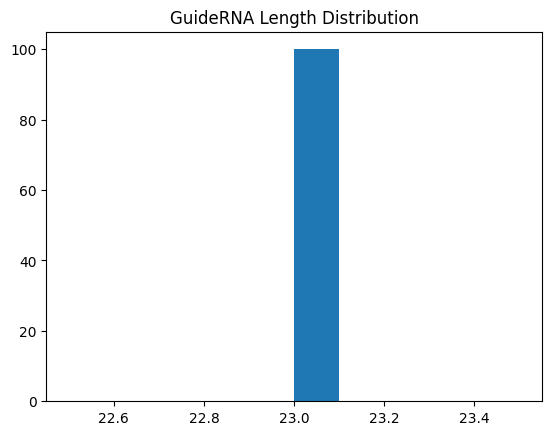

In [13]:
# Feature Engineering: gRNA Length
df["Guide_Length"] = df["GuideRNA"].apply(len)
print(df["Guide_Length"].describe())
import matplotlib.pyplot as plt
plt.hist(df["Guide_Length"])
plt.title("GuideRNA Length Distribution")
plt.show()


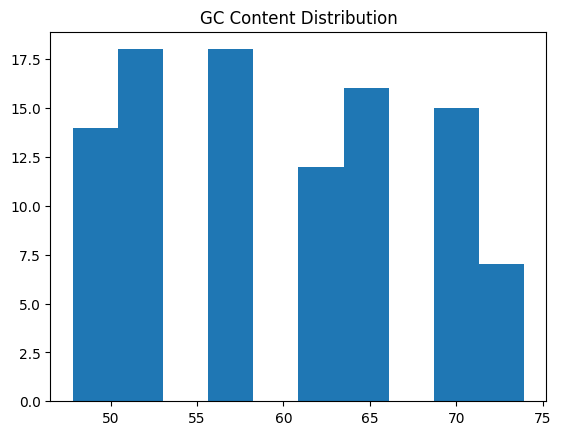

In [14]:
# Feature Engineering: GC Content
def gc_content(seq):
    return (seq.count('G') + seq.count('C')) / len(seq) * 100

df["GC%"] = df["GuideRNA"].apply(gc_content)
plt.hist(df["GC%"])
plt.title("GC Content Distribution")
plt.show()


In [15]:
# Data Cleaning/Saving
df.to_csv("deepcrispr_on_target_cleaned.csv", index=False)


In [24]:
# Reload and Feature Creation
df = pd.read_csv("deepcrispr_on_target_cleaned.csv")
df.columns = ["Chromosome", "Start", "End", "Strand", "GuideRNA", "F1", "F2", "F3", "F4", "Label", "Guide_Length", "GC%"]

for nt in ['A', 'T', 'G', 'C']:
    df[f"{nt}_freq"] = df["GuideRNA"].apply(lambda x: x.count(nt) / len(x))


In [17]:
# Data Split and Label Distribution
from sklearn.model_selection import train_test_split

X = df[["A_freq", "T_freq", "G_freq", "C_freq"]]
y = df["Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(df["Label"].value_counts())


Label
1    67
0    33
Name: count, dtype: int64


In [18]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


[[ 0  7]
 [ 0 13]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.65      1.00      0.79        13

    accuracy                           0.65        20
   macro avg       0.33      0.50      0.39        20
weighted avg       0.42      0.65      0.51        20



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
# XGBoost Classifier
from xgboost import XGBClassifier

model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


[[1 6]
 [5 8]]
              precision    recall  f1-score   support

           0       0.17      0.14      0.15         7
           1       0.57      0.62      0.59        13

    accuracy                           0.45        20
   macro avg       0.37      0.38      0.37        20
weighted avg       0.43      0.45      0.44        20



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:56:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


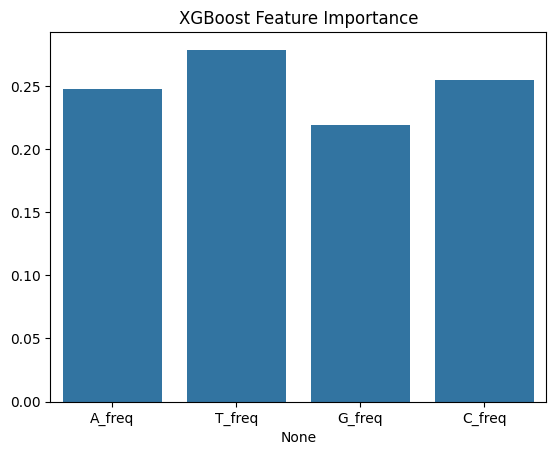

In [20]:
# XGBoost Feature Importance
import seaborn as sns

feature_importance = model_xgb.feature_importances_
sns.barplot(x=X.columns, y=feature_importance)
plt.title("XGBoost Feature Importance")
plt.show()


In [21]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


[[1 6]
 [4 9]]
              precision    recall  f1-score   support

           0       0.20      0.14      0.17         7
           1       0.60      0.69      0.64        13

    accuracy                           0.50        20
   macro avg       0.40      0.42      0.40        20
weighted avg       0.46      0.50      0.48        20



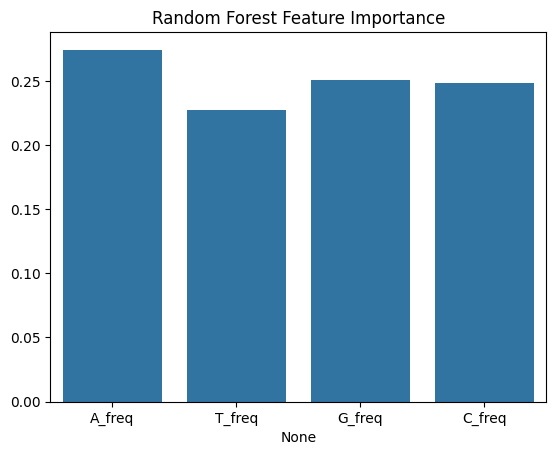

In [22]:
# Random Forest Feature Importance
feature_importance_rf = model_rf.feature_importances_
sns.barplot(x=X.columns, y=feature_importance_rf)
plt.title("Random Forest Feature Importance")
plt.show()


In [23]:
# Simple Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

nn_model = Sequential([
    Dense(16, activation='relu', input_shape=(4,)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=50, verbose=0)

y_pred_nn = (nn_model.predict(X_test) > 0.5).astype(int)
print(confusion_matrix(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
[[ 0  7]
 [ 0 13]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.65      1.00      0.79        13

    accuracy                           0.65        20
   macro avg       0.33      0.50      0.39        20
weighted avg       0.42      0.65      0.51        20



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Overall Conclusion:

    All models show low performance, particularly in identifying instances of class 0.
    The dataset is imbalanced, with significantly more samples in class 1 (67) than in class 0 (33). This is a major factor contributing to the poor performance on class 0.
    The features used (nucleotide frequencies) might not be sufficiently discriminative for this classification task.

# Improvement Strategies:

    Address Class Imbalance:
        Resampling Techniques: Implement techniques like Oversampling (e.g., SMOTE) on the minority class (class 0) or Undersampling on the majority class (class 1) to create a more balanced training set.
        Class Weights: For models that support it (like Logistic Regression, XGBoost, and some Neural Network implementations), use class weights to penalize misclassifications of the minority class more heavily.
    Feature Engineering:
        Explore other features that might be more informative for distinguishing on-target from off-target sites. This could include:
            Sequence context around the guide RNA.
            Thermodynamic properties of the sequences.
            Mismatch patterns between the guide RNA and potential off-target sites (for the off-target datasets).
    Model Selection and Tuning:
        Experiment with different model architectures and hyperparameters.
        Use cross-validation to get a more robust estimate of model performance and tune hyperparameters effectively.
    Collect More Data: If possible, obtaining more balanced data with a larger number of samples, especially for the minority class, would significantly help improve model performance.
    Error Analysis: Analyze the misclassified samples to understand why the models are failing for those specific instances. This can provide insights into potential new features or data cleaning steps.

# Conclusion of the strategy

The main conclusion from the improvement strategies is that addressing the class imbalance and exploring more informative features are crucial steps to improve the performance of the models, especially in correctly identifying instances of the minority class (class 0). Experimenting with different models and tuning them properly, along with analyzing errors, will also contribute to building a more robust and accurate classifier for this dataset.
